In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

df = pd.read_csv('results.csv')

arsenal_table = df[(df['home_team']== 'Liverpool') | (df['away_team']== 'Liverpool')]

arsenal_table['points_before'] = np.nan

def impute_column_data(cols):
    points_before = cols[0]
    result = cols[1]
    home_team = cols[2]
    away_team = cols[3]
    season = cols[4]
    
    while season:
        if pd.isnull(points_before):

            if result == 'D':
                return 1

            elif (result == 'H') & (home_team == "Liverpool"):
                return 3
            
            elif (result == 'A') & (away_team == "Liverpool"):
                return 3

            else:
                return 0

        else:
            return 0
        
        
arsenal_table['points_before'] = arsenal_table[['points_before','result',
                                                'home_team', 'away_team','season']].apply(impute_column_data, axis = 1)

arsenal_table['Sum_Points_before']= np.nan

sessions = arsenal_table['season'].unique()

for session in sessions:
    sum_df= arsenal_table[arsenal_table['season']== session ]
    def sum_(y):
        w = 0
        l = []
        for i in y:
            l.append(w)
            w = w +i
        return l
    arsenal_table['Sum_Points_before'][arsenal_table['season']== session ] = sum_(sum_df['points_before'])

arsenal_table[['Goal_For','Goal_Against']]= np.nan, np.nan



def impute_column_data(cols):
    Goal_Against = cols[0]
    home_team = cols[1]
    away_team = cols[2]
    season = cols[3]
    home_goal = cols[4]
    away_goal = cols[5]
    
    while season:
        if pd.isnull(Goal_Against):

            if  home_team != "Liverpool":
                return home_goal

            
            elif away_team != "Liverpool":
                return away_goal

            else:
                return 0

        else:
            return 0

arsenal_table['Goal_Against'] = arsenal_table[['Goal_Against','home_team', 'away_team',
                                            'season','home_goals','away_goals']].apply(impute_column_data, axis = 1)

def impute_column_data(cols):
    Goal_For = cols[0]
    home_team = cols[1]
    away_team = cols[2]
    season = cols[3]
    home_goal = cols[4]
    away_goal = cols[5]
    
    while season:
        if pd.isnull(Goal_For):

            if  home_team == "Liverpool":
                return home_goal

            
            elif away_team == "Liverpool":
                return away_goal

            else:
                return 0

        else:
            return 0

arsenal_table['Goal_For'] = arsenal_table[['Goal_For','home_team', 'away_team',
                                        'season','home_goals','away_goals']].apply(impute_column_data, axis = 1)

arsenal_table['Sum_Goal_For']=np.nan



for session in sessions:
    sum_df= arsenal_table[arsenal_table['season']== session ]
    def sum_(y):
        w = 0
        l = []
        for i in y:
            l.append(w)
            w = w +i
        return l
    arsenal_table['Sum_Goal_For'][arsenal_table['season']== session ] = sum_(sum_df['Goal_For'])

arsenal_table['Sum_Goal_Against']= np.nan

for session in sessions:
    sum_df= arsenal_table[arsenal_table['season']== session ]
    def sum_(y):
        w = 0
        l = []
        for i in y:
            l.append(w)
            w = w +i
        return l
    arsenal_table['Sum_Goal_Against'][arsenal_table['season']== session ] = sum_(sum_df['Goal_Against'])



arsenal_table['Result'] =np.nan

def impute_column_data(cols):
    Result = cols[0]
    result = cols[1]
    home_team = cols[2]
    away_team = cols[3]
    season = cols[4]
    
    while season:
        if pd.isnull(Result):

            if result == 'D':
                return 'Draw'

            elif (result == 'H') & (home_team == "Liverpool"):
                return 'Win'
            
            elif (result == 'A') & (away_team == "Liverpool"):
                return 'Win'

            else:
                return 'Loose'

        else:
            return  'Loose'

arsenal_table['Result'] = arsenal_table[['Result','result','home_team',
                                         'away_team','season']].apply(impute_column_data, axis = 1)



arsenal_table['count_wining']= np.nan

for session in sessions:
    sum_df= arsenal_table[arsenal_table['season']== session ]
    def sum_(y):
        l=[]
        gf = []
        for x in y:
            if x == 'Win':
                l.append(x)
                s = len(l)
                gf.append(s)
            else:
                gf.append(0)
        gf.insert(0,0)
        gf.pop()
        return gf
    arsenal_table['count_wining'][arsenal_table['season']== session ] = sum_(sum_df['Result'])

arsenal_table['count_loose']= np.nan

for session in sessions:
    sum_df= arsenal_table[arsenal_table['season']== session ]
    def sum_(y):
        l=[]
        gf = []
        for x in y:
            if x == 'Loose':
                l.append(x)
                s = len(l)
                gf.append(s)
            else:
                gf.append(0)
        gf.insert(0,0)
        gf.pop()
        return gf
    arsenal_table['count_loose'][arsenal_table['season']== session ] = sum_(sum_df['Result'])





arsenal_table['count_draw']= np.nan

for session in sessions:
    sum_df= arsenal_table[arsenal_table['season']== session ]
    def sum_(y):
        l=[]
        gf = []
        for x in y:
            if x == 'Draw':
                l.append(x)
                s = len(l)
                gf.append(s)
            else:
                gf.append(0)
        gf.insert(0,0)
        gf.pop()
        return gf
    arsenal_table['count_draw'][arsenal_table['season']== session ] = sum_(sum_df['Result'])

arsenal_table['Goal_diff'] = np.nan

def impute_column_data(cols):
    Goal_diff= cols[0]
    Sum_Goal_For = cols[1]
    Sum_Goal_Against = cols[2]
    season = cols[3]
    
    while season:
        if pd.isnull(Goal_diff):
            gd = Sum_Goal_For -  Sum_Goal_Against 
            return gd

        else:
            return  'Loose'



arsenal_table['Goal_diff'] =arsenal_table[['Goal_diff','Sum_Goal_For',
                                           'Sum_Goal_Against','season']].apply(impute_column_data,axis=1)


arsenal_table['number_of games'] = np.nan

for session in sessions:
    sum_df= arsenal_table[arsenal_table['season']== session ]
    arsenal_table['number_of games'][arsenal_table['season']== session ] = np.arange(0,len(sum_df))

arsenal_table.set_index('number_of games', inplace = True)

arsenal_table.reset_index(inplace= True)



Result = pd.get_dummies(arsenal_table['Result'])
result = pd.get_dummies(arsenal_table['result'])

Arsenal_Data = pd.concat([arsenal_table,Result,result], axis = 1)



Arsenal_Data.drop(['Result','points_before', 'Goal_For','Goal_Against', 
                   'season','home_team', 'away_team','result' ], axis = 1, inplace = True)


Arsenal_Data.rename(columns = {'number_of games':'GamesPlayed',
                               'home_goals':'HomeGoals',
                               'away_goals':'AwayGoals',
                               'Sum_Points_before':'SumPointBefore',
                               'Sum_Goal_For':'SumGoalFor',
                               'Sum_Goal_Against':'SumGoalAgainst',
                               'count_wining':'countWining',
                               'count_loose':'countLoose',
                               'count_draw':'countDraw',
                               'Goal_diff':'GoalDiff',},
                                inplace = True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(Arsenal_Data.drop(['Win','HomeGoals','AwayGoals','A','D','H', 'Draw','Loose'],axis=1), 
                                                    Arsenal_Data['Win'], test_size=0.30, 
                                                    random_state=101)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

file = "ArsenalPredictions.sav"
pickle.dump(logmodel, open(file, 'wb'))


predictions = logmodel.predict(X_test)

X_test.head(40)

y_test.head(40)

print(classification_report(y_test,predictions))



C:\Users\HP\AppData\Local\Temp\ipykernel_10608\3101768466.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arsenal_table['points_before'] = np.nan
C:\Users\HP\AppData\Local\Temp\ipykernel_10608\3101768466.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arsenal_table['points_before'] = arsenal_table[['points_before','result',
C:\Users\HP\AppData\Local\Temp\ipykernel_10608\3101768466.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

C:\Users\HP\AppData\Local\Temp\ipykernel_10608\3101768466.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arsenal_table['Sum_Goal_For'][arsenal_table['season']== session ] = sum_(sum_df['Goal_For'])
C:\Users\HP\AppData\Local\Temp\ipykernel_10608\3101768466.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arsenal_table['Sum_Goal_For'][arsenal_table['season']== session ] = sum_(sum_df['Goal_For'])
C:\Users\HP\AppData\Local\Temp\ipykernel_10608\3101768466.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

C:\Users\HP\AppData\Local\Temp\ipykernel_10608\3101768466.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arsenal_table['Sum_Goal_Against'][arsenal_table['season']== session ] = sum_(sum_df['Goal_Against'])
C:\Users\HP\AppData\Local\Temp\ipykernel_10608\3101768466.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arsenal_table['Sum_Goal_Against'][arsenal_table['season']== session ] = sum_(sum_df['Goal_Against'])
C:\Users\HP\AppData\Local\Temp\ipykernel_10608\3101768466.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\HP\AppData\Local\Temp\ipykernel_10608\3101768466.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arsenal_table['count_loose'][arsenal_table['season']== session ] = sum_(sum_df['Result'])
C:\Users\HP\AppData\Local\Temp\ipykernel_10608\3101768466.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arsenal_table['count_loose'][arsenal_table['season']== session ] = sum_(sum_df['Result'])
C:\Users\HP\AppData\Local\Temp\ipykernel_10608\3101768466.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

C:\Users\HP\AppData\Local\Temp\ipykernel_10608\3101768466.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arsenal_table['count_draw'][arsenal_table['season']== session ] = sum_(sum_df['Result'])
C:\Users\HP\AppData\Local\Temp\ipykernel_10608\3101768466.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arsenal_table['count_draw'][arsenal_table['season']== session ] = sum_(sum_df['Result'])
C:\Users\HP\AppData\Local\Temp\ipykernel_10608\3101768466.py:239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

              precision    recall  f1-score   support

           0       0.44      0.71      0.54        59
           1       0.59      0.31      0.40        78

    accuracy                           0.48       137
   macro avg       0.51      0.51      0.47       137
weighted avg       0.52      0.48      0.46       137



C:\Users\HP\AppData\Local\Temp\ipykernel_10608\3101768466.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arsenal_table['number_of games'][arsenal_table['season']== session ] = np.arange(0,len(sum_df))


In [3]:
df.head(20)

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007
5,Reading,Middlesbrough,3.0,2.0,H,2006-2007
6,West Ham United,Charlton Athletic,3.0,1.0,H,2006-2007
7,Bolton Wanderers,Tottenham Hotspur,2.0,0.0,H,2006-2007
8,Manchester United,Fulham,5.0,1.0,H,2006-2007
9,Chelsea,Manchester City,3.0,0.0,H,2006-2007


In [5]:
arsenal_table

,number_of games,home_team,away_team,home_goals,away_goals,result,season,points_before,Sum_Points_before,Goal_For,Goal_Against,Sum_Goal_For,Sum_Goal_Against,Result,count_wining,count_loose,count_draw,Goal_diff
0,0.0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007,1,0.0,1.0,1.0,0.0,0.0,Draw,0.0,0.0,0.0,0.0
1,1.0,Liverpool,West Ham United,2.0,1.0,H,2006-2007,3,1.0,2.0,1.0,1.0,1.0,Win,0.0,0.0,1.0,0.0
2,2.0,Everton,Liverpool,3.0,0.0,H,2006-2007,0,4.0,0.0,3.0,3.0,2.0,Loose,1.0,0.0,0.0,1.0
3,3.0,Chelsea,Liverpool,1.0,0.0,H,2006-2007,0,4.0,0.0,1.0,3.0,5.0,Loose,0.0,1.0,0.0,-2.0
4,4.0,Liverpool,Newcastle United,2.0,0.0,H,2006-2007,3,4.0,2.0,0.0,3.0,6.0,Win,0.0,2.0,0.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,33.0,Liverpool,AFC Bournemouth,3.0,0.0,H,2017-2018,3,67.0,3.0,0.0,75.0,35.0,Win,0.0,0.0,10.0,40.0
452,34.0,West Bromwich Albion,Liverpool,2.0,2.0,D,2017-2018,1,70.0,2.0,2.0,78.0,35.0,Draw,20.0,0.0,0.0,43.0
453,35.0,Liverpool,Stoke City,0.0,0.0,D,2017-2018,1,71.0,0.0,0.0,80.0,37.0,Draw,0.0,0.0,11.0,43.0
454,36.0,Chelsea,Liverpool,1.0,0.0,H,2017-2018,0,72.0,0.0,1.0,80.0,37.0,Loose,0.0,0.0,12.0,43.0


0

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([0], dtype=uint8)

<AxesSubplot:>

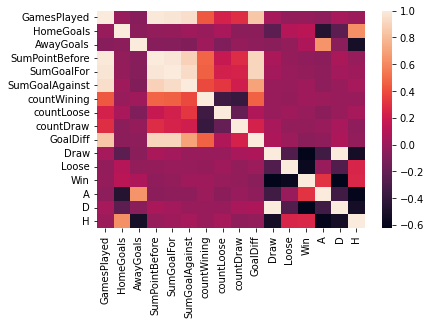

In [15]:
sns.heatmap(Arsenal_Data.corr())

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Win', ylabel='Density'>

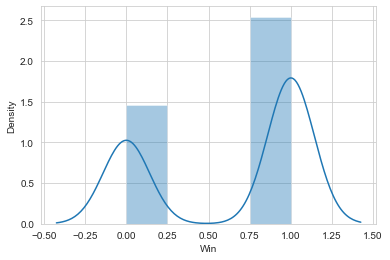

In [14]:
sns.distplot(Arsenal_Data["Win"])

<AxesSubplot:xlabel='Result', ylabel='count'>

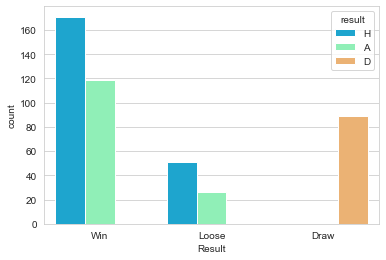

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Result',hue='result',data=arsenal_table,palette='rainbow')

In [39]:
import scikit-learn
print(scikit-learn.__version__)

SyntaxError: invalid syntax (3082377753.py, line 1)